In [62]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [63]:
data=pd.read_csv("seeds.txt",header=None,delimiter="\t")

In [64]:
data.head()

,0,1,2,3,4,5,6,7
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [65]:
data.columns=["area","perimeter","compactness C = 4*pi*A/P^2","length of kernel","width of kernel","asymmetry coefficient","length of kernel groove","wheats"]

In [66]:
data=data.sample(frac = 1)

In [67]:
data.describe()

,area,perimeter,compactness C = 4*pi*A/P^2,length of kernel,width of kernel,asymmetry coefficient,length of kernel groove,wheats
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071,2.000000
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480,0.818448
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000,1.000000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000,1.000000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000,2.000000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000,3.000000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000,3.000000


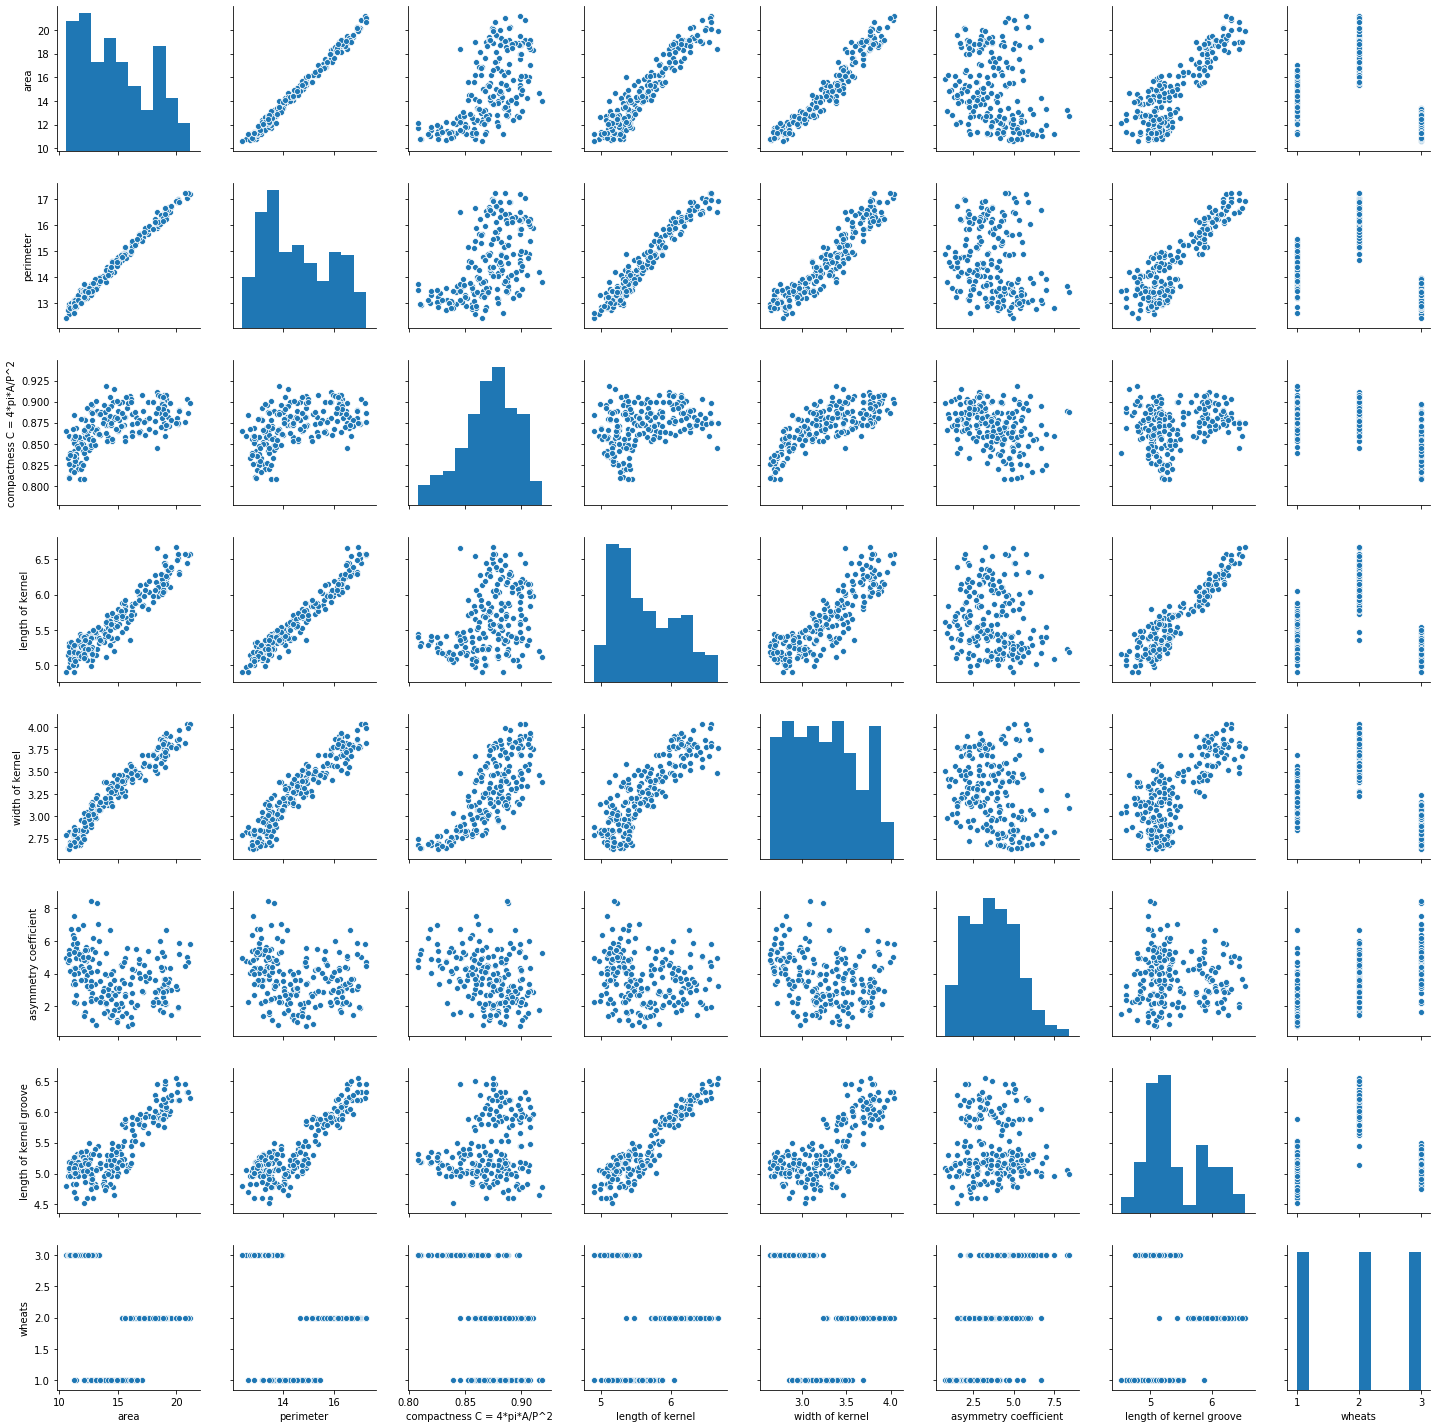

In [68]:
sns.pairplot(data)

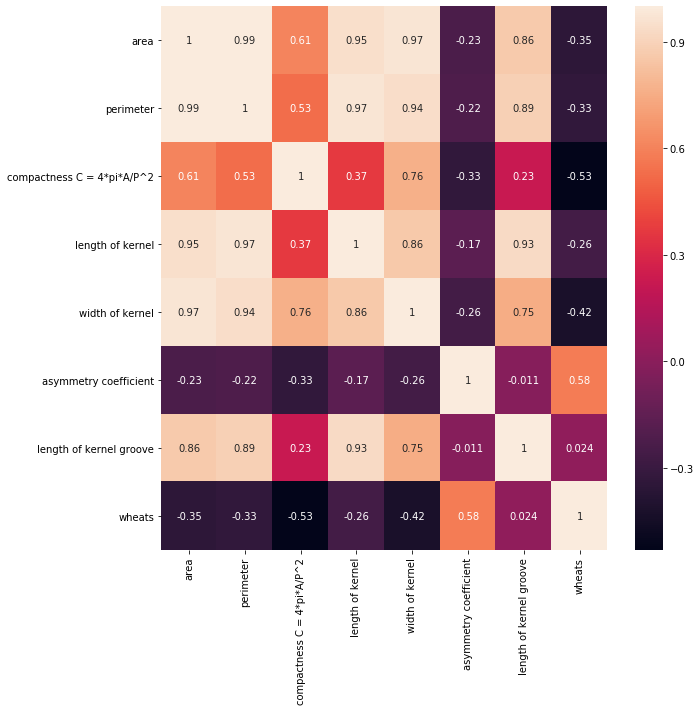

In [69]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot=True)

In [70]:
X=data.drop(columns=["perimeter","wheats","length of kernel","width of kernel","length of kernel groove"])
Y=data["wheats"]

In [71]:
X.head()

,area,compactness C = 4*pi*A/P^2,asymmetry coefficient
52,14.49,0.8538,4.116
100,16.41,0.8866,4.217
26,13.02,0.8641,3.373
15,14.59,0.8993,4.185
175,10.80,0.8590,4.773


In [72]:
Y.head()

52     1
100    2
26     1
15     1
175    3
Name: wheats, dtype: int64

In [73]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

In [74]:
models={"LogisticRegression":LogisticRegression(),
       "LinearSVC":LinearSVC(),
       "KNeighborsClassifier":KNeighborsClassifier(),
       "DecisionTreeClassifier":DecisionTreeClassifier(random_state=40),
       "RandomForestClassifier":RandomForestClassifier(random_state=40),
        "AdaBoostClassifier":AdaBoostClassifier()
       }

In [75]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [76]:
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.3,random_state=40)

In [77]:
xtrain.head()

,area,compactness C = 4*pi*A/P^2,asymmetry coefficient
31,15.49,0.8724,3.412
168,11.35,0.8291,4.337
95,16.87,0.8648,3.696
37,17.08,0.9079,2.956
38,14.80,0.8823,3.112


In [78]:
for model in models.values():
    model.fit(xtrain,ytrain)
    print(accuracy_score(ytest,model.predict(xtest)))

0.9206349206349206
0.9365079365079365
0.9682539682539683
0.873015873015873
0.9047619047619048
0.8095238095238095


C:\Users\Ganesh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Ganesh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Ganesh\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Ganesh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [79]:
from sklearn.model_selection import GridSearchCV

In [80]:
params_dist={"n_estimators":[50,100,150,200],
    "criterion":['gini',"entropy"],
    "max_depth":[4,5,6,7],
    "max_features":['auto',"sqrt","log2"],
    "min_samples_split":[2,3,4],
    "min_samples_leaf":[1,2,3]
    
}

In [81]:
ranrf=GridSearchCV(estimator=RandomForestClassifier(random_state=40),param_grid=params_dist,cv=3,n_jobs=-1,verbose=3)

In [ ]:
ranrf.fit(xtrain,ytrain)

Fitting 3 folds for each of 864 candidates, totalling 2592 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  72 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done 326 tasks      | elapsed:   19.2s
[Parallel(n_jobs=-1)]: Done 646 tasks      | elapsed:   38.1s
[Parallel(n_jobs=-1)]: Done 1094 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 1670 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 2374 tasks      | elapsed:  2.4min


In [ ]:
ranrf.best_score_

In [53]:
ranrf.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=5, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=40, verbose=0,
                       warm_start=False)

In [58]:
model=RandomForestClassifier(n_estimators=100, max_depth=5, max_features='auto',criterion='gini',random_state=40,min_samples_leaf=3, min_samples_split=2)

In [59]:
# model=RandomForestClassifier(n_estimators=100, max_depth=6, max_features='auto',criterion='gini',random_state=43)

In [60]:
model.fit(xtrain,ytrain)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=5, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=40, verbose=0,
                       warm_start=False)

In [61]:
model.score(xtest,ytest)

0.873015873015873